Importing Libraries


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers, Sequential

Data Preprocessing

In [2]:
#create a function to get the importanat columns, since we have multiplte datasets
def get_cols(data):
    cols = ['Date and time']
    for i in data:
        if "Gear" in i:
            if "(°C)" in i:
                cols.append(i)
    new_df = pd.DataFrame(columns=cols)
    for i in new_df:
        new_df[i] = data[i]
    return new_df

In [3]:
def combining_data(path):
    comb_data = pd.DataFrame(columns=['Date and time','Gear oil inlet temperature (°C)','Gear oil temperature (°C)','Gear oil temperature, Max (°C)','Gear oil temperature, Min (°C)','Gear oil temperature, Standard deviation (°C)','Gear oil inlet temperature, Max (°C)','Gear oil inlet temperature, Min (°C)','Gear oil inlet temperature, StdDev (°C)'])

    for i in os.listdir(path):
        df = pd.read_csv(path+'/'+i)
        df1 = get_cols(df)
        comb_data = pd.concat([comb_data, df1])
    return comb_data

In [4]:
train = combining_data('2020')
test = combining_data('2021')

In [5]:
train

,Date and time,Gear oil inlet temperature (°C),Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)"
0,01-01-2020 00:00,55.497500,56.972500,57.099998,56.799999,9.549207e-02,NaN,NaN,NaN
1,01-01-2020 00:10,55.230000,56.695001,56.750000,56.599998,3.840561e-02,NaN,NaN,NaN
2,01-01-2020 00:20,55.107500,56.640000,56.700001,56.400002,6.819121e-02,NaN,NaN,NaN
3,01-01-2020 00:30,55.135000,56.432500,56.650002,56.299999,1.028044e-01,NaN,NaN,NaN
4,01-01-2020 00:40,54.915000,56.169998,56.349998,56.049999,9.797955e-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
52699,31-12-2020 23:10,50.375000,50.830000,51.000000,50.799999,6.403169e-02,50.450001,50.299999,0.046099
52700,31-12-2020 23:20,50.307499,50.792500,50.900002,50.700001,6.759271e-02,50.400002,50.099998,0.084077
52701,31-12-2020 23:30,50.109999,50.742500,50.799999,50.700001,4.815267e-02,50.299999,50.000000,0.093005
52702,31-12-2020 23:40,50.037499,50.799999,50.799999,50.799999,2.130000e-14,50.099998,49.900002,0.054485


In [6]:
test

,Date and time,Gear oil inlet temperature (°C),Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)"
0,01-01-2021 00:00,12.5775,17.4425,17.600000,17.4,0.057609,12.900000,12.40,0.107790
1,01-01-2021 00:10,13.6875,18.2200,19.700001,17.4,0.915205,17.000000,9.55,2.128020
2,01-01-2021 00:20,14.7600,18.2300,19.600000,17.6,0.558659,16.100000,13.10,0.806009
3,01-01-2021 00:30,12.5200,17.4850,17.799999,17.1,0.212779,12.900000,12.40,0.143527
4,01-01-2021 00:40,13.0025,17.7850,18.900000,17.1,0.721474,16.799999,8.80,1.693109
...,...,...,...,...,...,...,...,...,...
26059,30-06-2021 23:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26060,30-06-2021 23:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26061,30-06-2021 23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26062,30-06-2021 23:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_data = train.drop(['Gear oil inlet temperature (°C)', 'Gear oil inlet temperature, Max (°C)', 'Gear oil inlet temperature, Min (°C)', 'Gear oil inlet temperature, StdDev (°C)'], axis=1)
test_data = test.drop(['Gear oil inlet temperature (°C)', 'Gear oil inlet temperature, Max (°C)', 'Gear oil inlet temperature, Min (°C)', 'Gear oil inlet temperature, StdDev (°C)'], axis=1)

In [8]:
train_data

,Date and time,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
0,01-01-2020 00:00,56.972500,57.099998,56.799999,9.549207e-02
1,01-01-2020 00:10,56.695001,56.750000,56.599998,3.840561e-02
2,01-01-2020 00:20,56.640000,56.700001,56.400002,6.819121e-02
3,01-01-2020 00:30,56.432500,56.650002,56.299999,1.028044e-01
4,01-01-2020 00:40,56.169998,56.349998,56.049999,9.797955e-02
...,...,...,...,...,...
52699,31-12-2020 23:10,50.830000,51.000000,50.799999,6.403169e-02
52700,31-12-2020 23:20,50.792500,50.900002,50.700001,6.759271e-02
52701,31-12-2020 23:30,50.742500,50.799999,50.700001,4.815267e-02
52702,31-12-2020 23:40,50.799999,50.799999,50.799999,2.130000e-14


In [9]:
test_data

,Date and time,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
0,01-01-2021 00:00,17.4425,17.600000,17.4,0.057609
1,01-01-2021 00:10,18.2200,19.700001,17.4,0.915205
2,01-01-2021 00:20,18.2300,19.600000,17.6,0.558659
3,01-01-2021 00:30,17.4850,17.799999,17.1,0.212779
4,01-01-2021 00:40,17.7850,18.900000,17.1,0.721474
...,...,...,...,...,...
26059,30-06-2021 23:10,NaN,NaN,NaN,NaN
26060,30-06-2021 23:20,NaN,NaN,NaN,NaN
26061,30-06-2021 23:30,NaN,NaN,NaN,NaN
26062,30-06-2021 23:40,NaN,NaN,NaN,NaN


In [10]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [11]:
# train_data.to_csv('train.csv')
# test_data.to_csv('test.csv')

AutoEncoder for anomoly detection

In [12]:
train_data.drop('Date and time', axis=1, inplace=True)
test_data.drop('Date and time', axis=1, inplace=True)

In [13]:
train_data

,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
0,56.972500,57.099998,56.799999,9.549207e-02
1,56.695001,56.750000,56.599998,3.840561e-02
2,56.640000,56.700001,56.400002,6.819121e-02
3,56.432500,56.650002,56.299999,1.028044e-01
4,56.169998,56.349998,56.049999,9.797955e-02
...,...,...,...,...
52699,50.830000,51.000000,50.799999,6.403169e-02
52700,50.792500,50.900002,50.700001,6.759271e-02
52701,50.742500,50.799999,50.700001,4.815267e-02
52702,50.799999,50.799999,50.799999,2.130000e-14


In [14]:
test_data

,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
0,17.442500,17.600000,17.400000,0.057609
1,18.220000,19.700001,17.400000,0.915205
2,18.230000,19.600000,17.600000,0.558659
3,17.485000,17.799999,17.100000,0.212779
4,17.785000,18.900000,17.100000,0.721474
...,...,...,...,...
23950,57.497499,57.700001,57.049999,0.178518
23951,57.591667,57.750000,57.400002,0.113345
23952,57.375001,57.400002,57.299999,0.037082
23953,57.239474,57.400002,57.000000,0.176650


In [15]:
# Defining the autoencoder model
input_layer = Input(shape=(train_data.shape[1],4))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(train_data.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, decoded)

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 4)]            0         
                                                                 
 dense (Dense)               (None, 4, 128)            640       
                                                                 
 dense_1 (Dense)             (None, 4, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 4, 32)             2080      
                                                                 
 dense_3 (Dense)             (None, 4, 16)             528       
                                                                 
 dense_4 (Dense)             (None, 4, 32)             544       
                                                                 
 dense_5 (Dense)             (None, 4, 64)             2112  

In [16]:
#fitting the model
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=64,validation_split=0.2, shuffle=True).history

Epoch 1/100
3899/3899 [==============================] - 9s 2ms/step - loss: 8.3783 - val_loss: 0.0639
Epoch 2/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0815 - val_loss: 0.0623
Epoch 3/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0846 - val_loss: 0.0613
Epoch 4/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0827 - val_loss: 0.0616
Epoch 5/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0789 - val_loss: 0.0576
Epoch 6/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0787 - val_loss: 0.0578
Epoch 7/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0769 - val_loss: 0.0885
Epoch 8/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0762 - val_loss: 0.0575
Epoch 9/100
3899/3899 [==============================] - 7s 2ms/step - loss: 0.0756 - val_loss: 0.0592
Epoch 10/100
3899/3899 [==============================] - 7s 2ms/step - l

In [17]:
model_json = autoencoder.to_json()
with open("Anomoly_det_model.json", "w") as json_file:
    json_file.write(model_json)

autoencoder.save_weights("Anomoly_det_model.h5")

Plotting loss/error

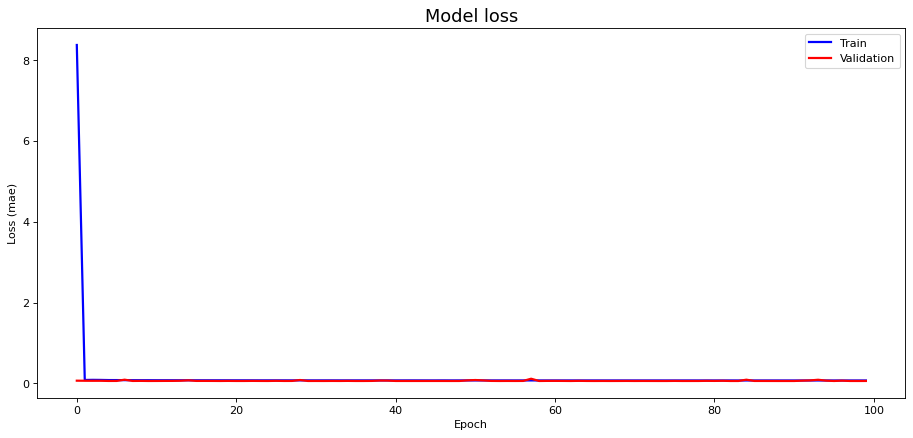

In [18]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()